In [1]:
import pandas as pd

In [2]:
interests = pd.read_csv('https://cocl.us/datascience_survey_data')
interests.set_index('Unnamed: 0', inplace=True)
interests.index.name = None
interests

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
interests2 = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)
interests2

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Question 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ascending = interests2.sort_values('Very interested', ascending = False)
#ascending['Total'] = ascending.sum(axis=1)
#ascending

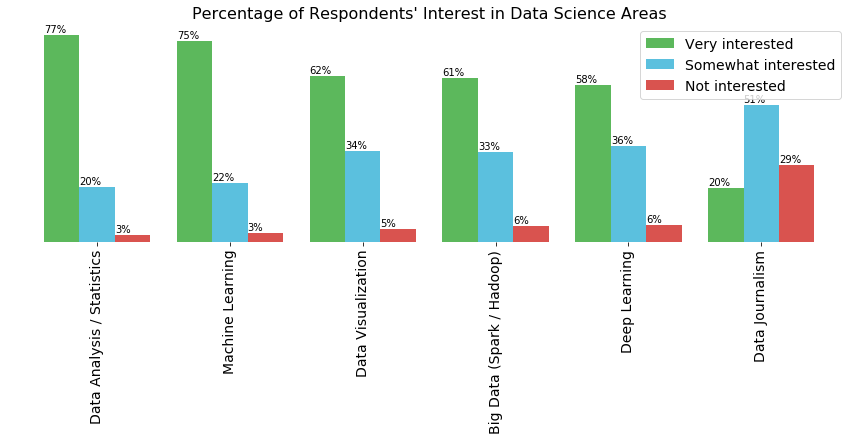

In [6]:
colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (ascending.div(ascending.sum(1), axis=0)).plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=ascending.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)


plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

### Question 3

In [7]:
crimes = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
#El as_index lo ponemos a False para que Neighborhood no se ponga en el indice
g1 = crimes.groupby('PdDistrict', as_index= False).count()
g1.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek','Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location'], axis = 1, inplace = True)
g1.rename(columns={'PdDistrict': 'Neighborhood', 'PdId': 'Count'}, inplace = True)
g1

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


### Question 4 

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pablo\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.1.0               |           py37_0         721 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    conda-4.7.5                |           py37_0         3.0 MB  conda-forge
    conda-package-handling-1.3.10|           py37_0         277 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

  altair             conda-forge/win-64::altair-3.1

In [9]:
!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
world_geo = r'world_countries.json' # geojson file
latitude = 37.77
longitude = -122.42
world_map = folium.Map(location=[latitude, longitude], zoom_start=12)
world_geo

'world_countries.json'

In [11]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=g1,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
world_map

FileNotFoundError: [Errno 2] No such file or directory: 'world_countries.json'